In [19]:
random_state = 16

## Imports

In [20]:
!pip install scikit-learn xgboost scikit-optimize

In [21]:
!pip install pandas numpy seaborn matplotlib yellowbrick scipy

In [22]:
#imports
from sklearn.ensemble import BaggingRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.pipeline import Pipeline
from sklearn.model_selection import HalvingGridSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.style import set_palette
from yellowbrick.style import rcmod
from sklearn.feature_selection import SelectFromModel

## Parameters

In [23]:
num=list(np.logspace(-2, 1, num = 20))
max=1
etas = list(filter(lambda x: x < max, num))


In [24]:
param_xgb2 = {
    "estimator__max_depth" : range(1, 6),
    "estimator__eta" : etas
}

In [25]:
parameters_dtc = {
    'estimator__max_depth':range(1, 15),
}

In [26]:
parameters_knr = {
    'n_neighbors':range(1, 80),
}

## Data

In [27]:
!ls

clusters2.csv  mlp_2.png			   protherm_groups.csv
DTC_P1.png     my_plot.png			   protherm.ipynb
DTC_P2.png     organisms.png			   protherm_test.csv
EN_P2.png      p1_xgb.txt			   protherm_train.csv
esm_1280       p2_xgb.txt			   test.csv
esm_320        pipeline_1.ipynb			   tm_c_count.png
esm_meltome    pipeline_2.ipynb			   train.csv
groups.csv     preprocessing.ipynb		   Untitled.ipynb
KNN_P1.png     protherm.csv			   XGBoost.ipynb
KNN_P2.png     protherm_deep_physchem.csv	   zero_features.csv
mlp_1.png      protherm_deep_physchem_initial.csv  zero_features_p2.csv


In [28]:
train = pd.read_csv("protherm_train.csv", index_col = 0)
train.head()

,Length,Tm_C,AA,AR,RA,AN,NA,AD,DA,AC,...,epsilon,oxidized-reduced,de_mul,ivywrel,methyl_groups,tighter_packing,hydrophobic,beta_branched,h_bond_form,vip
0,468,57.83,0.014989,0.002141,0.010707,0.006424,0.000000,0.004283,0.004283,0.000000,...,59250,125,0.004191,0.399573,0.393162,0.279915,0.316239,0.183761,0.096154,0.170940
1,602,46.77,0.018303,0.001664,0.004992,0.008319,0.003328,0.008319,0.003328,0.000000,...,63830,625,0.004249,0.362126,0.382060,0.244186,0.302326,0.166113,0.091362,0.142857
2,447,58.78,0.006726,0.008969,0.002242,0.008969,0.006726,0.006726,0.006726,0.004484,...,42400,250,0.002948,0.351230,0.393736,0.259508,0.333333,0.170022,0.071588,0.154362
3,206,66.59,0.034146,0.004878,0.000000,0.019512,0.014634,0.004878,0.004878,0.000000,...,43430,0,0.003676,0.330097,0.364078,0.247573,0.320388,0.121359,0.063107,0.121359
5,797,47.89,0.011307,0.002513,0.003769,0.006281,0.001256,0.008794,0.003769,0.002513,...,148740,375,0.003671,0.388959,0.381430,0.259724,0.343789,0.160602,0.084065,0.159348


In [30]:
test = pd.read_csv("protherm_test.csv", index_col = 0)
test.head()

,Length,Tm_C,AA,AR,RA,AN,NA,AD,DA,AC,...,epsilon,oxidized-reduced,de_mul,ivywrel,methyl_groups,tighter_packing,hydrophobic,beta_branched,h_bond_form,vip
4,761,44.79,0.010526,0.001316,0.005263,0.003947,0.003947,0.002632,0.007895,0.003947,...,88590,625,0.004051,0.388962,0.369251,0.239159,0.320631,0.168200,0.106439,0.157687
16,520,46.49,0.003854,0.009634,0.011561,0.000000,0.001927,0.007707,0.007707,0.001927,...,20860,750,0.004530,0.396154,0.398077,0.251923,0.340385,0.144231,0.103846,0.150000
18,453,44.71,0.017699,0.013274,0.004425,0.002212,0.000000,0.008850,0.011062,0.002212,...,40340,375,0.003250,0.388521,0.419426,0.298013,0.331126,0.167770,0.086093,0.167770
19,428,48.48,0.014052,0.000000,0.007026,0.004684,0.002342,0.004684,0.002342,0.002342,...,29910,250,0.003799,0.364486,0.411215,0.266355,0.364486,0.156542,0.060748,0.156542
21,391,49.10,0.015385,0.002564,0.005128,0.010256,0.007692,0.000000,0.007692,0.000000,...,32430,125,0.003035,0.352941,0.391304,0.283887,0.373402,0.132992,0.046036,0.168798


In [31]:
groups = pd.read_csv("protherm_groups.csv", index_col = 0)
groups.head()

,cluster#
0,3092
1,0
2,1
3,734
5,1396


In [32]:
X_train = train.drop(columns=['Tm_C'])
y_train = train['Tm_C']
X_test = test.drop(columns=['Tm_C'])
y_test = test['Tm_C']

In [33]:
X_train.shape, X_test.shape

((5338, 446), (1334, 446))

In [34]:
X_train.head()

,Length,AA,AR,RA,AN,NA,AD,DA,AC,CA,...,epsilon,oxidized-reduced,de_mul,ivywrel,methyl_groups,tighter_packing,hydrophobic,beta_branched,h_bond_form,vip
0,468,0.014989,0.002141,0.010707,0.006424,0.000000,0.004283,0.004283,0.000000,0.000000,...,59250,125,0.004191,0.399573,0.393162,0.279915,0.316239,0.183761,0.096154,0.170940
1,602,0.018303,0.001664,0.004992,0.008319,0.003328,0.008319,0.003328,0.000000,0.000000,...,63830,625,0.004249,0.362126,0.382060,0.244186,0.302326,0.166113,0.091362,0.142857
2,447,0.006726,0.008969,0.002242,0.008969,0.006726,0.006726,0.006726,0.004484,0.002242,...,42400,250,0.002948,0.351230,0.393736,0.259508,0.333333,0.170022,0.071588,0.154362
3,206,0.034146,0.004878,0.000000,0.019512,0.014634,0.004878,0.004878,0.000000,0.000000,...,43430,0,0.003676,0.330097,0.364078,0.247573,0.320388,0.121359,0.063107,0.121359
5,797,0.011307,0.002513,0.003769,0.006281,0.001256,0.008794,0.003769,0.002513,0.001256,...,148740,375,0.003671,0.388959,0.381430,0.259724,0.343789,0.160602,0.084065,0.159348


In [35]:
groups.shape

(5338, 1)

## XGBoost

In [25]:
xgb = XGBRegressor(random_state=random_state)
rs = RandomizedSearchCV(
        RFE(xgb, n_features_to_select=100, step  = 50),
        param_distributions=param_xgb2, 
        cv=GroupKFold(n_splits=5),
        scoring="neg_root_mean_squared_error", 
        refit = "neg_root_mean_squared_error", 
        return_train_score=True, 
        error_score='raise', 
        n_jobs=-1
)
rs.fit(X_train, y_train, groups = groups)
    

print(rs.best_estimator_)
y_pred_train = rs.predict(X_train)
print("xgb train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                    r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
y_pred_test = rs.predict(X_test)
print("xgb test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_pred_test, squared = False),
                                            r2_score(y_test, y_pred_test), pearsonr(y_test, y_pred_test)))

print()

RFE(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, early_stopping_rounds=None,
                           enable_categorical=False, eta=0.04281332398719394,
                           eval_metric=None, feature_types=None, gamma=None,
                           gpu_id=None, grow_policy=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_bin=None, max_cat_threshold=None,
                           max_cat_to_onehot=None, max_delta_step=None,
                           max_depth=5, max_leaves=None, min_child_weight=None,
                           missing=nan, monotone_constraints=None,
                           n_estimators=100, n_jobs=None,
                           num_parallel_tree=None, predictor=None, ...),
    n_features_to_select=100, step=50)
xgb trai

In [26]:
with open("p1_xgb.txt", 'w') as f: 
    for key, value in rs.cv_results_.items(): 
        f.write('%s:%s\n' % (key, value))

In [27]:
rs.cv_results_

{'mean_fit_time': array([1916.90890369, 1931.67381177, 3265.02239814, 7598.79199209,
        7615.35031958, 7585.96990843, 5122.34021816, 7424.72320929,
        6641.51763859, 1891.43778477]),
 'std_fit_time': array([ 22.33105505,  12.8482857 ,  14.2993128 ,  10.57681371,
         24.21585078,  32.22610975,  81.31348627,  25.40887455,
        639.45522115,  44.6610384 ]),
 'mean_score_time': array([0.71042271, 0.77334161, 0.65404172, 0.49988694, 0.32686758,
        0.48562093, 0.56825638, 0.16922026, 0.07927518, 0.70380559]),
 'std_score_time': array([0.09698229, 0.26503884, 0.13281578, 0.13562811, 0.10170112,
        0.13856999, 0.10196603, 0.06819694, 0.0619153 , 0.14927949]),
 'param_estimator__max_depth': masked_array(data=[1, 1, 2, 4, 4, 4, 3, 5, 5, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_estimator__eta': masked_array(data=[0.08858667904100823, 0.0

In [36]:
#np.mean(rs.cv_results_['mean_test_score']), np.mean(rs.cv_results_['mean_train_score'])

## Decision Tree

In [21]:
for i in range(100, 500, 100):
    rfe = RFE(DecisionTreeRegressor(random_state=random_state), n_features_to_select=i, step  = 10)
    rfe.fit(X_train, y_train)
    print(f'Number of features: {i}')
    grid_dtc = GridSearchCV(
        rfe, 
        parameters_dtc, 
        scoring = ['neg_root_mean_squared_error'], 
        refit = 'neg_root_mean_squared_error', 
        cv = GroupKFold(n_splits=5),
        return_train_score=True, 
        n_jobs=-1, 
        error_score='raise'
    )
    grid_dtc.fit(X_train, y_train, groups = groups)
    print(grid_dtc.best_estimator_)
    dtc = grid_dtc.best_estimator_

    y_pred_train = dtc.predict(X_train)
    print("decision train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                    r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
    y_test_dtr = dtc.predict(X_test)
    print("decision test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_test_dtr, squared = False),
                                            r2_score(y_test, y_test_dtr), pearsonr(y_test, y_test_dtr)))
    print()                                 


Number of features: 100
RFE(estimator=DecisionTreeRegressor(max_depth=4, random_state=16),
    n_features_to_select=100, step=10)
decision train RMSE: 8.784180762307553, R2: 0.5114632409669353, PCC: PearsonRResult(statistic=0.7151665826693352, pvalue=0.0)
decision test RMSE: 9.608463488436204, R2: 0.40656946667475524, PCC: PearsonRResult(statistic=0.6425145058422979, pvalue=3.3924101326858005e-156)

Number of features: 200
RFE(estimator=DecisionTreeRegressor(max_depth=4, random_state=16),
    n_features_to_select=200, step=10)
decision train RMSE: 8.784180762307553, R2: 0.5114632409669354, PCC: PearsonRResult(statistic=0.7151665826693352, pvalue=0.0)
decision test RMSE: 9.608463488436206, R2: 0.406569466674755, PCC: PearsonRResult(statistic=0.6425145058422979, pvalue=3.3924101326858005e-156)

Number of features: 300
RFE(estimator=DecisionTreeRegressor(max_depth=4, random_state=16),
    n_features_to_select=300, step=10)
decision train RMSE: 8.784180762307553, R2: 0.5114632409669354, PC

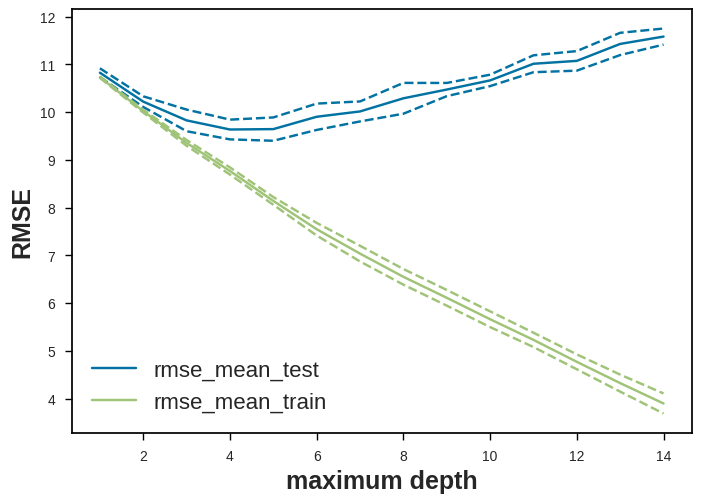

In [25]:
scores_mean_test = grid_dtc.cv_results_['mean_test_neg_root_mean_squared_error']*-1
scores_mean_train = grid_dtc.cv_results_['mean_train_neg_root_mean_squared_error']*-1
scores_std_test = grid_dtc.cv_results_['std_test_neg_root_mean_squared_error']*-1
scores_std_train = grid_dtc.cv_results_['std_train_neg_root_mean_squared_error']*-1
range_depth = parameters_dtc['estimator__max_depth']

plt.figure()

plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams.update({'font.size': 22})
plt.grid(False)
plt.tick_params(axis="x", direction="out", length = 5, color = 'black')
plt.tick_params(axis="y", direction="out", length = 5, color = 'black')

plt.plot(range_depth, scores_mean_test, 'b')
plt.plot(range_depth, scores_mean_train, 'g')

plt.plot(range_depth, scores_mean_test + scores_std_test, 'b--')
plt.plot(range_depth, scores_mean_test - scores_std_test, 'b--')

plt.plot(range_depth, scores_mean_train + scores_std_train, 'g--')
plt.plot(range_depth, scores_mean_train - scores_std_train, 'g--')

plt.xlabel('maximum depth',fontweight='bold', fontsize = 18)
plt.ylabel('RMSE', fontweight='bold', fontsize = 18)
plt.legend(['rmse_mean_test', 'rmse_mean_train'], loc = 'lower left', fontsize = 16)
plt.savefig('DTC_P1.png')
plt.show()

## KNeighborsRegressor



In [55]:
knr = KNeighborsRegressor()
grid_knr = RandomizedSearchCV(knr, parameters_knr, scoring = ['neg_root_mean_squared_error'], refit = 'neg_root_mean_squared_error', cv = GroupKFold(n_splits=5), return_train_score=True, n_jobs=-1, error_score='raise')
grid_knr.fit(X_train, y_train, groups = groups)
print(grid_knr.best_estimator_)
knr = grid_knr.best_estimator_

y_pred_train = knr.predict(X_train)
print("knr train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                 r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
y_test_knr = knr.predict(X_test)
print("knr test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_test_knr, squared = False),
                                                r2_score(y_test, y_test_knr), pearsonr(y_test, y_test_knr)))


KNeighborsRegressor(n_neighbors=36)
knr train RMSE: 12.124667929327646, R2: 0.06924704323001185, PCC: PearsonRResult(statistic=0.26494904643722794, pvalue=1.9048987356197944e-86)
knr test RMSE: 12.28342875342605, R2: 0.030157477013463718, PCC: PearsonRResult(statistic=0.1824407325301755, pvalue=1.898370913200104e-11)


In [30]:
knr = KNeighborsRegressor()
grid_knr = GridSearchCV(
    knr, 
    parameters_knr, 
    scoring = ['neg_root_mean_squared_error'], 
    refit = 'neg_root_mean_squared_error', 
    cv = GroupKFold(n_splits=5), 
    return_train_score=True, 
    n_jobs=-1, 
    error_score='raise'
)
grid_knr.fit(X_train, y_train, groups = groups)
print(grid_knr.best_estimator_)

KNeighborsRegressor(n_neighbors=20)


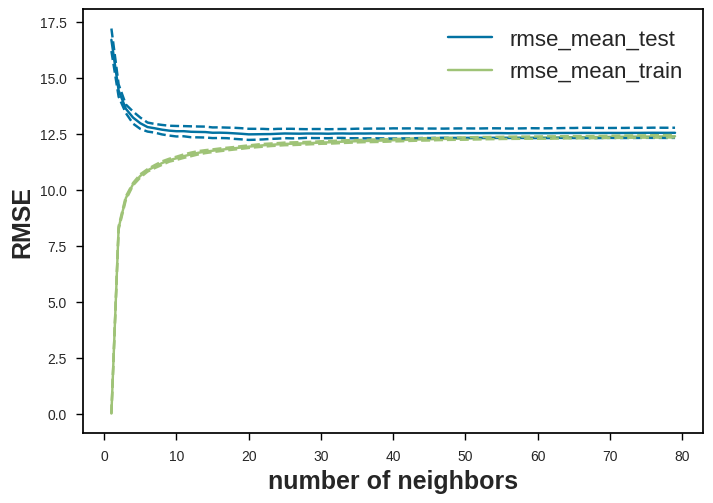

In [32]:
scores_mean_test = grid_knr.cv_results_['mean_test_neg_root_mean_squared_error']*-1
scores_mean_train = grid_knr.cv_results_['mean_train_neg_root_mean_squared_error']*-1
scores_std_test = grid_knr.cv_results_['std_test_neg_root_mean_squared_error']*-1
scores_std_train = grid_knr.cv_results_['std_train_neg_root_mean_squared_error']*-1
range_depth = parameters_knr['n_neighbors']

plt.figure()

plt.rcParams["axes.edgecolor"] = 'black'
plt.grid(False)
plt.tick_params(axis="x", direction="out", length = 5, color = 'black')
plt.tick_params(axis="y", direction="out", length = 5, color = 'black')

plt.plot(range_depth, scores_mean_test, 'b')
plt.plot(range_depth, scores_mean_train, 'g')

plt.plot(range_depth, scores_mean_test + scores_std_test, 'b--')
plt.plot(range_depth, scores_mean_test - scores_std_test, 'b--')

plt.plot(range_depth, scores_mean_train + scores_std_train, 'g--')
plt.plot(range_depth, scores_mean_train - scores_std_train, 'g--')

plt.xlabel('number of neighbors', fontweight='bold', fontsize = 18)
plt.ylabel('RMSE', fontweight='bold', fontsize = 18)
plt.legend(['rmse_mean_test', 'rmse_mean_train'], loc = 'upper right',  fontsize = 16)
plt.savefig('KNN_P1.png')

plt.show()

In [58]:
knr = grid_knr.best_estimator_
#knr.fit(X_train, y_train)

y_pred_train = knr.predict(X_train)
print("knr train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                 r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
y_test_knr = knr.predict(X_test)
print("knr test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_test_knr, squared = False),
                                                r2_score(y_test, y_test_knr), pearsonr(y_test, y_test_knr)))


knr train RMSE: 11.847060681549115, R2: 0.11138028461066596, PCC: PearsonRResult(statistic=0.3342850251614942, pvalue=1.6221894085144307e-139)
knr test RMSE: 12.372879007700352, R2: 0.015980892171369332, PCC: PearsonRResult(statistic=0.1881544027987184, pvalue=4.278425508147372e-12)


## MLP

In [30]:
mlpr_1 = make_pipeline(
    MinMaxScaler(),
    MLPRegressor(
        hidden_layer_sizes=(20, 20, 20), early_stopping=True, random_state=random_state
    ),
)
mlpr_1.fit(X_train, y_train)

y_pred_train = mlpr_1.predict(X_train)
print("mlpr train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train, y_pred_train, squared=False),
                                             r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
y_pred_test = mlpr_1.predict(X_test)
print("mlpr test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_pred_test, squared=False),
                                            r2_score(y_test, y_pred_test), pearsonr(y_test, y_pred_test)))

mlpr train RMSE: 6.823161488480774, R2: 0.7052417164219364, PCC: PearsonRResult(statistic=0.841007516291265, pvalue=0.0)
mlpr test RMSE: 7.733285465235082, R2: 0.6155940657077621, PCC: PearsonRResult(statistic=0.7847635551168027, pvalue=5.240023198773159e-279)


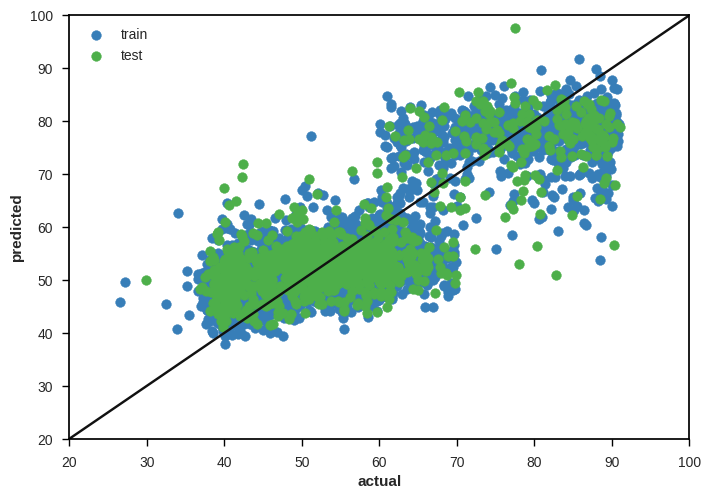

In [31]:
x = np.linspace(0, 100, 110)
plt.rcParams["axes.edgecolor"] = 'black'
#plt.axis('equal')
plt.xlim(20,100)
plt.ylim(20,100)
plt.grid(False)

plt.ylabel('predicted Tm', fontweight='bold')
plt.xlabel('actual Tm', fontweight='bold')
plt.plot(x,x,'k-') # identity line
plt.scatter(y_train, y_pred_train, label = 'train')
plt.scatter(y_test, y_pred_test, label = 'test')

plt.tick_params(axis="x", direction="out", length = 5, color = 'black')
plt.tick_params(axis="y", direction="out", length = 5, color = 'black')
plt.legend()
plt.savefig('mlp_1.png')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


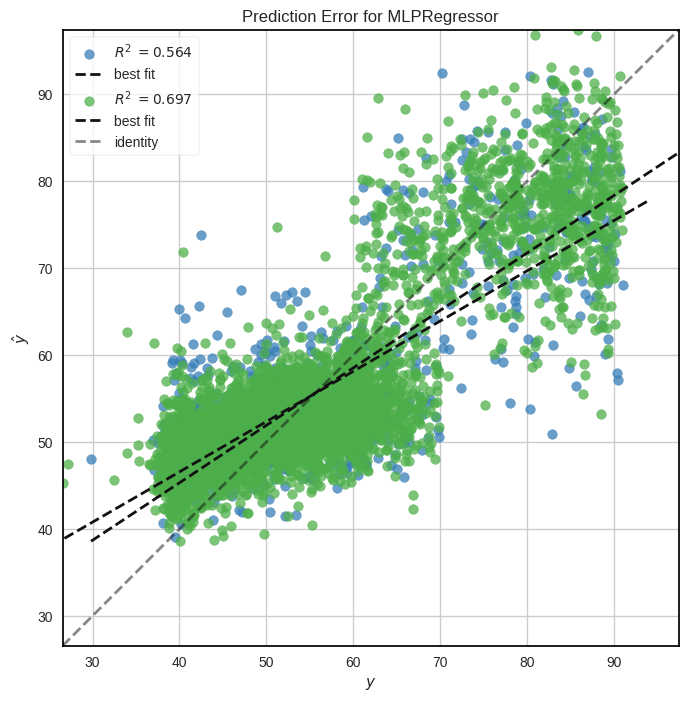

<AxesSubplot: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [33]:

visualizer = PredictionError(mlpr_1, size = (800, 800)) 
# fit visualizer on training data
set_palette('bold')
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
visualizer.score(X_train, y_train)

visualizer.show()